# Water Quality Parameters and Indices | Python

## Description
=========

## Code (with description)

### Setting the current working directory

In [1]:
import os
os.chdir('E:/Me/IIRS MTECH/Python Pilot Project')

### Setting up the sentinel api which will be used to download the sentinel 2 1c data directly within the python script

In [2]:
import json
from sentinelsat import SentinelAPI

creds = {}
with open('E:/Me/IIRS MTECH/Python Pilot Project/credentials.json') as temp:
    creds = json.load(temp)
    
user = creds['uid']
passw = creds['pass']

api = SentinelAPI(user, passw, 'https://scihub.copernicus.eu/dhus')


### Reading the shape files to create footprints in order to query the sentinel api to download the images

In [3]:
import geopandas as gpd
import folium
from shapely.geometry import MultiPolygon, Polygon

#defining footprint for Chilikha Lake
chilikha = gpd.read_file('./Footprints/Chilikha Lake/chilikha_lake.shp')
chilikha_footprint = chilikha['geometry']

# defining footprint for Okeechobee Lake
okeechobee = gpd.read_file('./Footprints/Okeechobee Lake/okeechobee_lake.shp')
okeechobee_footprint = okeechobee['geometry']

# print((chilikha_footprint[0]))
print((okeechobee_footprint[0]))

POLYGON ((-81.23194287617689 27.25237349862539, -80.49367262421495 27.2481115929252, -80.5040595433443 26.64912721358215, -81.17920928675105 26.67269063074645, -81.23194287617689 27.25237349862539))


### Quering the Sentinel DHUS for data using the above footprints as bounding boxes

In [4]:
#query for chilikha
products_chilikha = api.query(
            chilikha_footprint[0],
            date = ('20180101', '20181231'),
            platformname = 'Sentinel-2',
            processinglevel = 'Level-2A',
            cloudcoverpercentage = (0,70)
)

#query for okeechobee
products_okeechobee = api.query(
            okeechobee_footprint[0],
            date = ('20180101', '20181231'),
            platformname = 'Sentinel-2',
            processinglevel = 'Level-2A',
            cloudcoverpercentage = (0,70)
)

### Analyzing the query results selectively downloading the required data

In [6]:
#converting into dataframes to choose the product

chilikha_df = api.to_geodataframe(products_chilikha)
chilikha_df = chilikha_df.sort_values(['cloudcoverpercentage'], ascending=True)

okeechobee_df = api.to_geodataframe(products_okeechobee)
okeechobee_df = okeechobee_df.sort_values(['cloudcoverpercentage'], ascending=True)

okeechobee_df

target1 = chilikha_df['uuid'][0]
target2 = okeechobee_df['uuid'][0]

,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,relativeorbitnumber,...,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,uuid,geometry
06e41e5f-e721-4931-9db2-bb783d994e9b,S2B_MSIL2A_20181222T160509_N0211_R054_T17RNK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-22T16:05:09.024Z, Instrument: MS...",2018-12-22 22:30:27.301,2018-12-22 16:05:09.024,2018-12-22 16:05:09.024,9375,54,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1018.92 MB,06e41e5f-e721-4931-9db2-bb783d994e9b,"POLYGON ((-81.00021 27.12246964175013, -79.892..."
b5efdd43-b08f-4616-84a6-f2353e7621c2,S2B_MSIL2A_20181222T160509_N0211_R054_T17RMK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-22T16:05:09.024Z, Instrument: MS...",2018-12-22 22:24:43.322,2018-12-22 16:05:09.024,2018-12-22 16:05:09.024,9375,54,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,279.48 MB,b5efdd43-b08f-4616-84a6-f2353e7621c2,"POLYGON ((-81.28711 26.12983925163352, -81.278..."
437eb815-f93d-4c84-9f46-d85ab08833e4,S2B_MSIL2A_20181225T160659_N0211_R097_T17RML_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-25T16:06:59.024Z, Instrument: MS...",2018-12-26 00:34:08.512,2018-12-25 16:06:59.024,2018-12-25 16:06:59.024,9418,97,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.07 GB,437eb815-f93d-4c84-9f46-d85ab08833e4,"POLYGON ((-82.01764 28.02166745577606, -80.900..."
927c6e6c-7039-4bb7-a610-f61a092f9a29,S2B_MSIL2A_20181222T160509_N0211_R054_T17RML_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-22T16:05:09.024Z, Instrument: MS...",2018-12-22 22:23:19.427,2018-12-22 16:05:09.024,2018-12-22 16:05:09.024,9375,54,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,68.27 MB,927c6e6c-7039-4bb7-a610-f61a092f9a29,"POLYGON ((-81.066315 27.03360404768206, -81.06..."
e0792d96-fd68-4b15-9db1-8d17bfd03fad,S2A_MSIL2A_20181230T160651_N0211_R097_T17RMK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-30T16:06:51.024Z, Instrument: MS...",2018-12-30 23:22:51.054,2018-12-30 16:06:51.024,2018-12-30 16:06:51.024,18398,97,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.08 GB,e0792d96-fd68-4b15-9db1-8d17bfd03fad,POLYGON ((-82.00933999999999 27.11884292739272...
d8d9fc7a-458d-493b-9525-bedb59d98d0d,S2B_MSIL2A_20181222T160509_N0211_R054_T17RNL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-22T16:05:09.024Z, Instrument: MS...",2018-12-22 22:28:42.208,2018-12-22 16:05:09.024,2018-12-22 16:05:09.024,9375,54,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,960.42 MB,d8d9fc7a-458d-493b-9525-bedb59d98d0d,"POLYGON ((-81.00021 27.3014009017505, -80.9880..."
a9999938-0905-44d8-92b7-7265f4c2240d,S2A_MSIL2A_20181230T160651_N0211_R097_T17RNK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-30T16:06:51.024Z, Instrument: MS...",2018-12-30 23:22:20.973,2018-12-30 16:06:51.024,2018-12-30 16:06:51.024,18398,97,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,328.30 MB,a9999938-0905-44d8-92b7-7265f4c2240d,"POLYGON ((-80.519745 

In [90]:
#downloading the images
api.download(target1)


Downloading:  98%|██████████████████████████████████████████████████████████████████████▍ | 1.13G/1.16G [00:00<?, ?B/s]
Downloading:  98%|███████████████████████████████████████████████████████████████▌ | 1.13G/1.16G [00:08<03:24, 120kB/s]
Downloading:  98%|███████████████████████████████████████████████████████████████▋ | 1.13G/1.16G [00:12<02:43, 144kB/s]
Downloading:  98%|███████████████████████████████████████████████████████████████▋ | 1.13G/1.16G [00:15<02:08, 176kB/s]
Downloading:  98%|███████████████████████████████████████████████████████████████▊ | 1.14G/1.16G [00:18<01:43, 208kB/s]
Downloading:  98%|███████████████████████████████████████████████████████████████▊ | 1.14G/1.16G [00:21<01:25, 239kB/s]
Downloading:  98%|███████████████████████████████████████████████████████████████▉ | 1.14G/1.16G [00:28<01:37, 200kB/s]
Downloading:  98%|███████████████████████████████████████████████████████████████▉ | 1.14G/1.16G [00:30<01:13, 249kB/s]
Downloading:  99%|█████████████████████

MD5 checksumming:  38%|██████████████████████▋                                     | 437M/1.16G [00:13<00:29, 24.4MB/s]
MD5 checksumming:  38%|██████████████████████▊                                     | 440M/1.16G [00:13<00:29, 24.7MB/s]
MD5 checksumming:  39%|███████████████████████▏                                    | 446M/1.16G [00:13<00:24, 29.5MB/s]
MD5 checksumming:  39%|███████████████████████▍                                    | 453M/1.16G [00:13<00:20, 34.7MB/s]
MD5 checksumming:  40%|███████████████████████▋                                    | 457M/1.16G [00:13<00:19, 36.2MB/s]
MD5 checksumming:  40%|███████████████████████▉                                    | 461M/1.16G [00:14<00:18, 37.2MB/s]
MD5 checksumming:  40%|████████████████████████▏                                   | 465M/1.16G [00:14<00:19, 35.8MB/s]
MD5 checksumming:  41%|████████████████████████▎                                   | 470M/1.16G [00:14<00:18, 37.7MB/s]
MD5 checksumming:  41%|█████████████████

{'Creation Date': datetime.datetime(2018, 12, 24, 15, 21, 57, 118000),
 'Ingestion Date': datetime.datetime(2018, 12, 24, 15, 13, 17, 401000),
 'Online': True,
 'date': datetime.datetime(2018, 12, 24, 4, 52, 19, 24000),
 'downloaded_bytes': 25712467,
 'footprint': 'POLYGON((84.11840974586067 20.776045244654867,85.172480279363 20.790508687931236,85.18407610049057 19.798817712242066,84.1366755099283 19.785101677667722,84.11840974586067 20.776045244654867))',
 'id': '16d1b131-3033-4e3e-8b91-190688de3c48',
 'md5': '6F4C614C77701D5C933673A429E205AD',
 'path': '.\\S2B_MSIL2A_20181224T045219_N0211_R076_T45QTC_20181224T081321.zip',
 'size': 1157125971,
 'title': 'S2B_MSIL2A_20181224T045219_N0211_R076_T45QTC_20181224T081321',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('16d1b131-3033-4e3e-8b91-190688de3c48')/$value"}

In [93]:
#downloading 
api.download(target2)


Downloading:   1%|▉                                                                       | 14.7M/1.07G [00:00<?, ?B/s]
Downloading:   1%|▉                                                              | 15.7M/1.07G [00:03<1:02:00, 283kB/s]
Downloading:   2%|█                                                                | 16.8M/1.07G [00:05<51:05, 343kB/s]
Downloading:   2%|█                                                                | 17.8M/1.07G [00:06<41:53, 418kB/s]
Downloading:   2%|█▏                                                               | 18.9M/1.07G [00:07<35:09, 498kB/s]
Downloading:   2%|█▏                                                               | 19.9M/1.07G [00:09<31:31, 554kB/s]
Downloading:   2%|█▎                                                               | 21.0M/1.07G [00:12<37:13, 469kB/s]
Downloading:   2%|█▎                                                               | 22.0M/1.07G [00:18<57:25, 304kB/s]
Downloading:   2%|█▎                   

Downloading:  14%|█████████▎                                                       | 153M/1.07G [04:58<12:16, 1.24MB/s]
Downloading:  14%|█████████▍                                                       | 154M/1.07G [04:59<12:26, 1.22MB/s]
Downloading:  15%|█████████▍                                                       | 155M/1.07G [05:00<13:01, 1.17MB/s]
Downloading:  15%|█████████▌                                                       | 156M/1.07G [05:00<12:39, 1.20MB/s]
Downloading:  15%|█████████▋                                                        | 157M/1.07G [05:02<15:51, 958kB/s]
Downloading:  15%|█████████▋                                                       | 158M/1.07G [05:03<14:59, 1.01MB/s]
Downloading:  15%|█████████▋                                                       | 159M/1.07G [05:04<13:41, 1.11MB/s]
Downloading:  15%|█████████▊                                                       | 160M/1.07G [05:04<12:43, 1.19MB/s]
Downloading:  15%|█████████▊            

Downloading:  27%|█████████████████▋                                               | 292M/1.07G [07:25<10:10, 1.27MB/s]
Downloading:  27%|█████████████████▊                                               | 293M/1.07G [07:26<10:16, 1.26MB/s]
Downloading:  27%|█████████████████▊                                               | 294M/1.07G [07:27<10:31, 1.23MB/s]
Downloading:  28%|█████████████████▉                                               | 295M/1.07G [07:28<11:08, 1.16MB/s]
Downloading:  28%|█████████████████▉                                               | 296M/1.07G [07:28<09:59, 1.29MB/s]
Downloading:  28%|██████████████████                                               | 297M/1.07G [07:29<10:42, 1.20MB/s]
Downloading:  28%|██████████████████                                               | 298M/1.07G [07:30<09:35, 1.34MB/s]
Downloading:  28%|██████████████████▏                                              | 299M/1.07G [07:31<09:19, 1.38MB/s]
Downloading:  28%|██████████████████▏   

Downloading:  40%|██████████████████████████▏                                      | 430M/1.07G [09:16<06:21, 1.67MB/s]
Downloading:  40%|██████████████████████████▏                                      | 431M/1.07G [09:17<06:43, 1.58MB/s]
Downloading:  40%|██████████████████████████▎                                      | 432M/1.07G [09:18<08:14, 1.29MB/s]
Downloading:  41%|██████████████████████████▊                                       | 433M/1.07G [09:20<12:00, 882kB/s]
Downloading:  41%|██████████████████████████▊                                       | 434M/1.07G [09:21<11:51, 892kB/s]
Downloading:  41%|██████████████████████████▉                                       | 435M/1.07G [09:23<12:59, 812kB/s]
Downloading:  41%|██████████████████████████▉                                       | 436M/1.07G [09:24<13:47, 764kB/s]
Downloading:  41%|███████████████████████████                                       | 437M/1.07G [09:26<13:43, 767kB/s]
Downloading:  41%|██████████████████████

Downloading:  53%|██████████████████████████████████▌                              | 568M/1.07G [11:07<05:00, 1.66MB/s]
Downloading:  53%|██████████████████████████████████▋                              | 569M/1.07G [11:08<05:39, 1.47MB/s]
Downloading:  53%|██████████████████████████████████▋                              | 570M/1.07G [11:08<05:23, 1.54MB/s]
Downloading:  53%|██████████████████████████████████▊                              | 571M/1.07G [11:09<06:41, 1.24MB/s]
Downloading:  54%|██████████████████████████████████▊                              | 573M/1.07G [11:11<07:14, 1.14MB/s]
Downloading:  54%|██████████████████████████████████▉                              | 574M/1.07G [11:12<07:32, 1.09MB/s]
Downloading:  54%|██████████████████████████████████▉                              | 575M/1.07G [11:13<07:32, 1.09MB/s]
Downloading:  54%|███████████████████████████████████                              | 576M/1.07G [11:13<07:26, 1.10MB/s]
Downloading:  54%|██████████████████████

Downloading:  66%|██████████████████████████████████████████▉                      | 707M/1.07G [12:49<03:51, 1.56MB/s]
Downloading:  66%|███████████████████████████████████████████                      | 708M/1.07G [12:49<03:58, 1.51MB/s]
Downloading:  66%|███████████████████████████████████████████                      | 709M/1.07G [12:50<03:43, 1.61MB/s]
Downloading:  66%|███████████████████████████████████████████▏                     | 710M/1.07G [12:51<04:39, 1.28MB/s]
Downloading:  67%|███████████████████████████████████████████▎                     | 712M/1.07G [12:52<03:48, 1.56MB/s]
Downloading:  67%|███████████████████████████████████████████▍                     | 713M/1.07G [12:52<03:39, 1.62MB/s]
Downloading:  67%|███████████████████████████████████████████▍                     | 714M/1.07G [12:53<03:32, 1.67MB/s]
Downloading:  67%|███████████████████████████████████████████▌                     | 715M/1.07G [12:54<03:24, 1.73MB/s]
Downloading:  67%|██████████████████████

Downloading:  79%|███████████████████████████████████████████████████▍             | 846M/1.07G [14:59<03:23, 1.09MB/s]
Downloading:  79%|███████████████████████████████████████████████████▌             | 847M/1.07G [15:00<03:22, 1.09MB/s]
Downloading:  79%|███████████████████████████████████████████████████▌             | 848M/1.07G [15:01<03:34, 1.03MB/s]
Downloading:  79%|███████████████████████████████████████████████████▋             | 849M/1.07G [15:02<03:22, 1.08MB/s]
Downloading:  80%|███████████████████████████████████████████████████▋             | 850M/1.07G [15:03<03:20, 1.09MB/s]
Downloading:  80%|███████████████████████████████████████████████████▊             | 851M/1.07G [15:04<03:09, 1.14MB/s]
Downloading:  80%|███████████████████████████████████████████████████▊             | 852M/1.07G [15:05<02:53, 1.24MB/s]
Downloading:  80%|███████████████████████████████████████████████████▉             | 854M/1.07G [15:05<02:39, 1.35MB/s]
Downloading:  80%|██████████████████████

Downloading:  92%|███████████████████████████████████████████████████████████▉     | 985M/1.07G [16:46<01:03, 1.32MB/s]
Downloading:  92%|███████████████████████████████████████████████████████████▉     | 986M/1.07G [16:47<01:01, 1.35MB/s]
Downloading:  92%|████████████████████████████████████████████████████████████     | 987M/1.07G [16:48<01:04, 1.27MB/s]
Downloading:  92%|████████████████████████████████████████████████████████████     | 988M/1.07G [16:49<01:07, 1.20MB/s]
Downloading:  93%|████████████████████████████████████████████████████████████▏    | 989M/1.07G [16:50<01:06, 1.20MB/s]
Downloading:  93%|████████████████████████████████████████████████████████████▏    | 990M/1.07G [16:51<01:08, 1.15MB/s]
Downloading:  93%|████████████████████████████████████████████████████████████▎    | 991M/1.07G [16:52<01:11, 1.08MB/s]
Downloading:  93%|████████████████████████████████████████████████████████████▎    | 992M/1.07G [16:53<01:08, 1.12MB/s]
Downloading:  93%|██████████████████████

{'Creation Date': datetime.datetime(2018, 12, 22, 22, 49, 10, 870000),
 'Ingestion Date': datetime.datetime(2018, 12, 22, 22, 30, 27, 301000),
 'Online': True,
 'date': datetime.datetime(2018, 12, 22, 16, 5, 9, 24000),
 'downloaded_bytes': 1053792994,
 'footprint': 'POLYGON((-81.00021 27.12246964175013,-79.892395 27.118102453218583,-79.90192 26.12689436875678,-81.00021 26.131077727221793,-81.00021 27.12246964175013))',
 'id': '06e41e5f-e721-4931-9db2-bb783d994e9b',
 'md5': '8B3BEF995AF95BFFBC90FA79D2320156',
 'path': '.\\S2B_MSIL2A_20181222T160509_N0211_R054_T17RNK_20181222T195126.zip',
 'size': 1068473058,
 'title': 'S2B_MSIL2A_20181222T160509_N0211_R054_T17RNK_20181222T195126',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('06e41e5f-e721-4931-9db2-bb783d994e9b')/$value"}

### After unzipping the product folders, reading the band-wise files using the "rasterio" package of python, to eventually save different band combinations in GeoTIFF format

In [6]:
import rasterio as rio
from rasterio.plot import show
import os
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#setting the env variables 
os.environ['GDAL_DATA'] = os.environ['CONDA_PREFIX'] + r'\Library\share\gdal'

#============================Okeechobee============================#

#reading bands
Okch_R10 = './data/Okeechobee/2A/S2B_MSIL2A_20181222T160509_N0211_R054_T17RNK_20181222T195126.SAFE/GRANULE/L2A_T17RNK_A009375_20181222T160507/IMG_DATA/R10m/'
b2 = rio.open(Okch_R10 + 'T17RNK_20181222T160509_B02_10m.jp2')
b3 = rio.open(Okch_R10 + 'T17RNK_20181222T160509_B03_10m.jp2')
b4 = rio.open(Okch_R10 + 'T17RNK_20181222T160509_B04_10m.jp2')

#writing rgb image
with rio.open('./data/Okeechobee/2A/rgb_corrected.tiff', 'w', driver='Gtiff', width=b2.width, height=b2.height, 
              count=3, crs=b2.crs, transform=b2.transform, dtype=b2.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1)
    rgb.write(b3.read(1),2)
    rgb.write(b4.read(1),3)
    rgb.close()

#============================Chilikha============================#

#reading bands
Chlk_R10 = './data/Chilikha/2A/S2B_MSIL2A_20181224T045219_N0211_R076_T45QTC_20181224T081321.SAFE/GRANULE/L2A_T45QTC_A009397_20181224T050049/IMG_DATA/R10m/'
b2 = rio.open(Chlk_R10 + 'T45QTC_20181224T045219_B02_10m.jp2')
b3 = rio.open(Chlk_R10 + 'T45QTC_20181224T045219_B03_10m.jp2')
b4 = rio.open(Chlk_R10 + 'T45QTC_20181224T045219_B04_10m.jp2')

#writing rgb image
with rio.open('./data/Chilikha/2A/rgb_corrected.tiff', 'w', driver='Gtiff', width=b2.width, height=b2.height, 
              count=3, crs=b2.crs, transform=b2.transform, dtype=b2.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1)
    rgb.write(b3.read(1),2)
    rgb.write(b4.read(1),3)
    rgb.close()

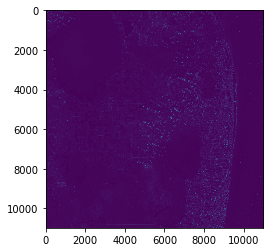

In [8]:
img = rio.open('./data/Okeechobee/2A/rgb.tiff')
img = img.read(1)
plt.imshow(img)

In [ ]:
img = rio.open('./data/Chilikha/2A/rgb_corrected.tiff')
img = img.read(1)
plt.imshow(img)

## Generating parametric bands for water quality analysis

### 1. NDWI - Normalised Difference Water Index (leaf moisture content)

In [7]:
import rasterio as rio
import os

import warnings
warnings.filterwarnings('ignore')

#setting the env variables 
os.environ['GDAL_DATA'] = os.environ['CONDA_PREFIX'] + r'\Library\share\gdal'

#============================Okeechobee============================#

#reading bands
Okch_R20 = './data/Okeechobee/2A/S2B_MSIL2A_20181222T160509_N0211_R054_T17RNK_20181222T195126.SAFE/GRANULE/L2A_T17RNK_A009375_20181222T160507/IMG_DATA/R20m/'
b8A = rio.open(Okch_R20 + 'T17RNK_20181222T160509_B8A_20m.jp2')
meta = b8A.meta
b8A = b8A.read()
b11 = rio.open(Okch_R20 + 'T17RNK_20181222T160509_B11_20m.jp2')
b11 = b11.read()

ndwi_lmc = (b8A.astype(float) - b11.astype(float))/(b8A + b11)

meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)

#writing the band as a tiff image
with rio.open('./data/Okeechobee/2A/ndwi_lmc.tiff', 'w', **meta) as dst:
    dst.write(ndwi_lmc.astype(rio.float32))


#============================Chilikha============================#

Chlk_R20 = './data/Chilikha/2A/S2B_MSIL2A_20181224T045219_N0211_R076_T45QTC_20181224T081321.SAFE/GRANULE/L2A_T45QTC_A009397_20181224T050049/IMG_DATA/R20m/'
b8A = rio.open(Chlk_R20 + 'T45QTC_20181224T045219_B8A_20m.jp2')
meta = b8A.meta
b8A = b8A.read()
b11 = rio.open(Chlk_R20 + 'T45QTC_20181224T045219_B11_20m.jp2')
b11 = b11.read()

ndwi_lmc = (b8A.astype(float) - b11.astype(float))/(b8A + b11)

meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)

#writing the band as a tiff image
with rio.open('./data/Chilikha/2A/ndwi_lmc.tiff', 'w', **meta) as dst:
    dst.write(ndwi_lmc.astype(rio.float32))


E:\Users\Chintan-Maniyar\Anaconda3\lib\site-packages\rasterio\__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
E:\Users\Chintan-Maniyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


### 2. NDWI (for water content)

In [11]:
import rasterio as rio
import os

import warnings
warnings.filterwarnings('ignore')

#setting the env variables 
os.environ['GDAL_DATA'] = os.environ['CONDA_PREFIX'] + r'\Library\share\gdal'

#============================Okeechobee============================#

#reading bands
Okch_R10 = './data/Okeechobee/2A/S2B_MSIL2A_20181222T160509_N0211_R054_T17RNK_20181222T195126.SAFE/GRANULE/L2A_T17RNK_A009375_20181222T160507/IMG_DATA/R10m/'
b3 = rio.open(Okch_R10 + 'T17RNK_20181222T160509_B03_10m.jp2')
meta = b3.meta
b3 = b3.read()
b8 = rio.open(Okch_R10 + 'T17RNK_20181222T160509_B08_10m.jp2')
b8 = b8.read()

ndwi_wc = (b3.astype(float) - b8.astype(float))/(b3 + b8)

meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)

#writing the band as a tiff image
with rio.open('./data/Okeechobee/2A/ndwi_wc.tiff', 'w', **meta) as dst:
    dst.write(ndwi_wc.astype(rio.float32))


#============================Chilikha============================#

Chlk_R10 = './data/Chilikha/2A/S2B_MSIL2A_20181224T045219_N0211_R076_T45QTC_20181224T081321.SAFE/GRANULE/L2A_T45QTC_A009397_20181224T050049/IMG_DATA/R10m/'
b3 = rio.open(Chlk_R10 + 'T45QTC_20181224T045219_B03_10m.jp2')
meta = b3.meta
b3 = b3.read()
b8 = rio.open(Chlk_R10 + 'T45QTC_20181224T045219_B08_10m.jp2')
b8 = b8.read()

ndwi_wc = (b3.astype(float) - b8.astype(float))/(b3 + b8)

meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)

#writing the band as a tiff image
with rio.open('./data/Chilikha/2A/ndwi_wc.tiff', 'w', **meta) as dst:
    dst.write(ndwi_wc.astype(rio.float32))

### 3. NDCI - Normalised Difference Chlorophyll Index

In [7]:
import rasterio as rio
import os

import warnings
warnings.filterwarnings('ignore')

#setting the env variables 
os.environ['GDAL_DATA'] = os.environ['CONDA_PREFIX'] + r'\Library\share\gdal'

#============================Okeechobee============================#

#reading bands
Okch_R20 = './data/Okeechobee/2A/S2B_MSIL2A_20181222T160509_N0211_R054_T17RNK_20181222T195126.SAFE/GRANULE/L2A_T17RNK_A009375_20181222T160507/IMG_DATA/R20m/'
b5 = rio.open(Okch_R20 + 'T17RNK_20181222T160509_B05_20m.jp2')
meta = b5.meta
b5 = b5.read()
b4 = rio.open(Okch_R20 + 'T17RNK_20181222T160509_B04_20m.jp2')
b4 = b4.read()

ndci = (b5.astype(float) - b4.astype(float))/(b5 + b4)
chla = (14.039 + 86.115*ndci.astype(float) + 194.325*ndci.astype(float)*ndci.astype(float))

meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)

#writing the band as a tiff image
with rio.open('./data/Okeechobee/2A/ndci.tiff', 'w', **meta) as dst:
    dst.write(ndci.astype(rio.float32))

with rio.open('./data/Okeechobee/2A/chla.tiff', 'w', **meta) as dst:
    dst.write(chla.astype(rio.float32))


#============================Chilikha============================#

Chlk_R20 = './data/Chilikha/2A/S2B_MSIL2A_20181224T045219_N0211_R076_T45QTC_20181224T081321.SAFE/GRANULE/L2A_T45QTC_A009397_20181224T050049/IMG_DATA/R20m/'
b5 = rio.open(Chlk_R20 + 'T45QTC_20181224T045219_B05_20m.jp2')
meta = b5.meta
b5 = b5.read()
b4 = rio.open(Chlk_R20 + 'T45QTC_20181224T045219_B04_20m.jp2')
b4 = b4.read()

ndci = (b5.astype(float) - b4.astype(float))/(b5 + b4)
chla = (14.039 + 86.115*ndci.astype(float) + 194.325*ndci.astype(float)*ndci.astype(float))

meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)

#writing the band as a tiff image
# with rio.open('./data/Chilikha/2A/ndci.tiff', 'w', **meta) as dst:
#     dst.write(ndci.astype(rio.float32))

with rio.open('./data/Chilikha/2A/chla.tiff', 'w', **meta) as dst:
    dst.write(chla.astype(rio.float32))

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: './data/Okeechobee/2A/ndci.tiff'